In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **GOAL:**
Analyze and visualize youth unemployment in South Africa !(I will only focus on South Africa)! AND, since I am making it about youth unemployment I will consider ages (15-24)

In [3]:
import pandas as pd

# defining the main dataframe
df= pd.read_csv('/content/drive/MyDrive/SDG_0852_SEX_AGE_RT_A-20250420T2350.csv')

In [6]:
df.head(100)

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Aruba,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15+",2011,8.900,NaN,NaN,NaN,NaN
1,Aruba,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15+",2011,8.600,NaN,NaN,NaN,NaN
2,Aruba,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Female,"Age (Youth, adults): 15+",2011,7.800,NaN,NaN,NaN,NaN
3,Aruba,PC - Population and Housing Census,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15+",2010,10.600,NaN,Nonstandard age group: Including age 14,NaN,Data reference period: September | Age coverag...
4,Aruba,PC - Population and Housing Census,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15-24",2010,28.860,NaN,Nonstandard age group: Including age 14,NaN,Data reference period: September | Age coverag...
...,...,...,...,...,...,...,...,...,...,...,...
95,Angola,LFS - Employment Survey,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 25+",2019,11.334,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
96,Angola,LFS - Employment Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15+",2019,16.446,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
97,Angola,LFS - Employment Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15-24",2019,33.384,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
98,Angola,LFS - Employment Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 25+",2019,10.485,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...


# **From the Table Above**:

1. ref_area.label: These are the countries.
2. source.label: How the stats were obtained.
3. indicator.label: % of unemployment rate.
4. sex.label: Female or Male.
5. classif1.label: Age category.
6. time: Years.
7. obs_value: Unemployment value.
8. obs_status.label: Indicates consistency of data source for the stats obtained.
9. note_classif.label
10. note_indicator.label
11. note_source.label

last 3: metadata.

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45172 entries, 0 to 45171
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ref_area.label        45172 non-null  object 
 1   source.label          45172 non-null  object 
 2   indicator.label       45172 non-null  object 
 3   sex.label             45172 non-null  object 
 4   classif1.label        45172 non-null  object 
 5   time                  45172 non-null  int64  
 6   obs_value             45103 non-null  float64
 7   obs_status.label      2022 non-null   object 
 8   note_classif.label    570 non-null    object 
 9   note_indicator.label  2281 non-null   object 
 10  note_source.label     22720 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.8+ MB


,time,obs_value
count,45172.000000,45103.000000
mean,2012.591096,10.671160
std,7.271982,9.318105
min,2000.000000,0.030000
25%,2006.000000,4.536500
50%,2013.000000,7.593000
75%,2019.000000,13.771000
max,2026.000000,74.595000


Most columns have an 'object' data type example:
0. ref_area.label        45172 non-null  object
1. source.label          45172 non-null  object
2. indicator.label       45172 non-null  object
3. sex.label             45172 non-null  object
4. classif1.label        45172 non-null  object

"obs_value" has a minimum of about 10% BUT skyrocketed to 74% of unemployment rate. This could be an outlier.

This dataset also starts from 2012- 2026.

In [7]:
# Since I want to focus on SA, I need to filter out the data so that I only focus on that country.

df_SA= df[df['ref_area.label']=='South Africa']

In [8]:
df_SA.head()

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
44795,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15+",2024,32.279,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
44796,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15-24",2024,60.111,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
44797,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 25+",2024,28.887,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
44798,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15+",2024,30.417,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
44799,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15-24",2024,56.985,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...


In [10]:
#next, I want to only focus on the youth. That is ages from 15-24.

df_SA_youth= df_SA[df_SA['classif1.label']=='Age (Youth, adults): 15-24']

In [11]:
df_SA_youth.head()

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
44796,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15-24",2024,60.111,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
44799,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15-24",2024,56.985,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
44802,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Female,"Age (Youth, adults): 15-24",2024,63.782,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
44805,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15-24",2023,60.082,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
44808,South Africa,LFS - Quarterly Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15-24",2023,56.760,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...


So far this dataset is filtered to only Focus on the South African unemployment rate, for youth that us between the ages of 15-24.

In [12]:
df_SA_youth.info()
df_SA_youth.describe()

print(df_SA_youth['ref_area.label'].unique())
print(df_SA_youth['source.label'].unique())
print(df_SA_youth['indicator.label'].unique())
print(df_SA_youth['sex.label'].unique())
print(df_SA_youth['classif1.label'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 44796 to 45018
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ref_area.label        75 non-null     object 
 1   source.label          75 non-null     object 
 2   indicator.label       75 non-null     object 
 3   sex.label             75 non-null     object 
 4   classif1.label        75 non-null     object 
 5   time                  75 non-null     int64  
 6   obs_value             75 non-null     float64
 7   obs_status.label      6 non-null      object 
 8   note_classif.label    0 non-null      object 
 9   note_indicator.label  6 non-null      object 
 10  note_source.label     75 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 9.1+ KB
['South Africa']
['LFS - Quarterly Labour Force Survey']
['SDG indicator 8.5.2 - Unemployment rate (%)']
['Total' 'Male' 'Female']
['Age (Youth, adults): 15-24']


# **From the results above:**

1. 'source.label': has no variation, so it won't be useful for finding a correlation. I can drop it.
2. There is only 'SDG indicator 8.5.2 - Unemployment rate (%)' under the indicator.label column. Again, it won't be helpful for a correlation,  can drop it.
3. There is a variation under the 'sex.label' column. The gender is aggregated (Total), or it is labelled distinctly (Female) and (Male). This data is categorical. I will keep this column for encoding and analysis. I can also analyze make vs female unemployement rate.
4. For this column 'classif1.label', only 'Age (Youth, adults): 15-24' are there (since the data has been filtered out for the youth only). I do not need to keep this anymore, I can drop it.

In [13]:
#dropping columns with no variation, or all nulls (non-informative columns)

new_dataset= df_SA_youth.drop(columns=['ref_area.label',
    'source.label',
    'indicator.label',
    'classif1.label',
    'obs_status.label',
    'note_classif.label',
    'note_indicator.label',
    'note_source.label'
])

new_dataset.head()

,sex.label,time,obs_value
44796,Total,2024,60.111
44799,Male,2024,56.985
44802,Female,2024,63.782
44805,Total,2023,60.082
44808,Male,2023,56.760


In [14]:
#Next I will convert "time" to datetime format

new_dataset['year']= pd.to_datetime(new_dataset['time'], format= '%Y')

In [15]:
# Now I am encoding "sex.label" since it is categorical, I will make it numeric

from sklearn.preprocessing import LabelEncoder

new_dataset_encoded= new_dataset.copy()

le= LabelEncoder()

new_dataset_encoded['sex.label']= le.fit_transform(new_dataset_encoded['sex.label'])

#dropping the old 'sex.label' column:
new_dataset_encoded= new_dataset_encoded.drop(columns='sex.label')

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Female': np.int64(0), 'Male': np.int64(1), 'Total': np.int64(2)}


In [16]:
new_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 44796 to 45018
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       75 non-null     int64         
 1   obs_value  75 non-null     float64       
 2   year       75 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.4 KB


In [17]:
#Great now I have encoded the sex.label column

#meaning I can now find correlations

print(new_dataset_encoded.corr())


               time  obs_value      year
time       1.000000   0.212301  1.000000
obs_value  0.212301   1.000000  0.212308
year       1.000000   0.212308  1.000000


From above, the diagonal is always '1' meaning that each variable is perfectly correlated with itself.

Between time and obs_value: I have a weak positive correlation. This means as the years go up, youth unemployment rate slightly increases, but not very strong.
This also means there is some upward trend in unemployment, but not consistent or linear.

# **EDA : EXPLORATIVE DATA ANALYSIS**


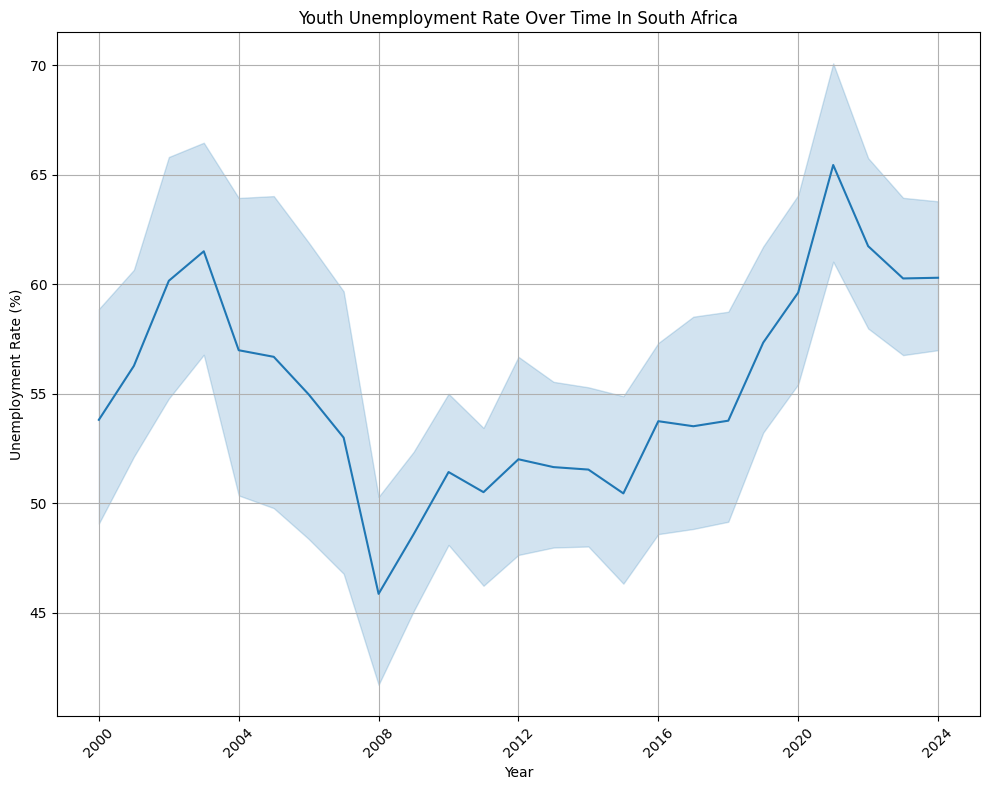

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.lineplot(data=new_dataset_encoded, x='year', y='obs_value')
plt.title('Youth Unemployment Rate Over Time In South Africa')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **What this means:**

1. This timeseries plot ranges from the year 2000- 2024.
2. The shaded area represents the confidence interval (variation/unceetainty across genders like Male, Female, Total)
3. The overall trend is increasing- youth unemployment in South Africa is higher now (2024) than in the early 2000's. This is actually supported by the correlation value of 0.21 (the rise is real but not perfectly steady)

Possible explaination: Post apartheid economic restructuring and youth labor maker challenges.

<Axes: xlabel='year', ylabel='obs_value'>

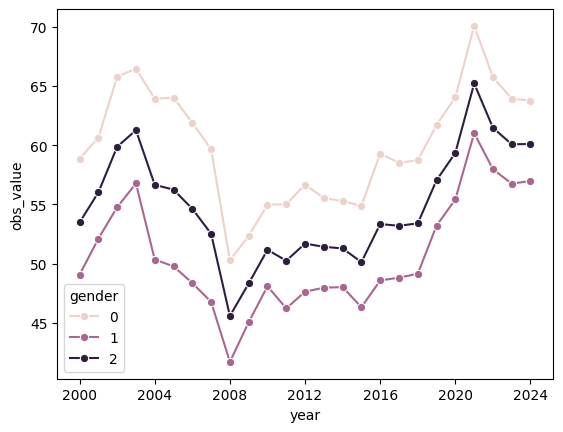

In [21]:
# now I am comparing Unemployment by Gender Over time

#The column name after encoding changed to the numeric representation, not 'sex.label'
#To fix this, assign a new column name for clarity and readability:

new_dataset_encoded['gender'] = le.fit_transform(new_dataset['sex.label'])

sns.lineplot(data=new_dataset_encoded, x='year', y='obs_value', hue= 'gender', marker='o')
#this will basically split the line into Male, Female, and Total, so I can see the gender gaps clearly.

# **Interpretation:**

1.   0- Female
2. 1- Male
3. 2- Both (Total)

1. In the early 2000's they had a high employmemt rate (reaching as high as 65%). This trend is an upward trend, and round 2018, the female unemployment rate rised higher, even reaching 70%.

2. Male: from 2000-2004 the was a steady rise in unemployment, but a drop in 2008. And a steady rise again- the most notable rise again in unemplyment occured in 2018; reaching as high as 60%.

3. For both genders there's a similar trend, and unemployment for the South African Youth sits at a high 65%.

In [22]:
#exporting the clean datasett for power BI:
new_dataset_encoded.to_csv('youth_unemployment_data_SA_cleaned.csv')